#THEORITICAL QUESTIONS

1. What is a Decision Tree, and how does it work?

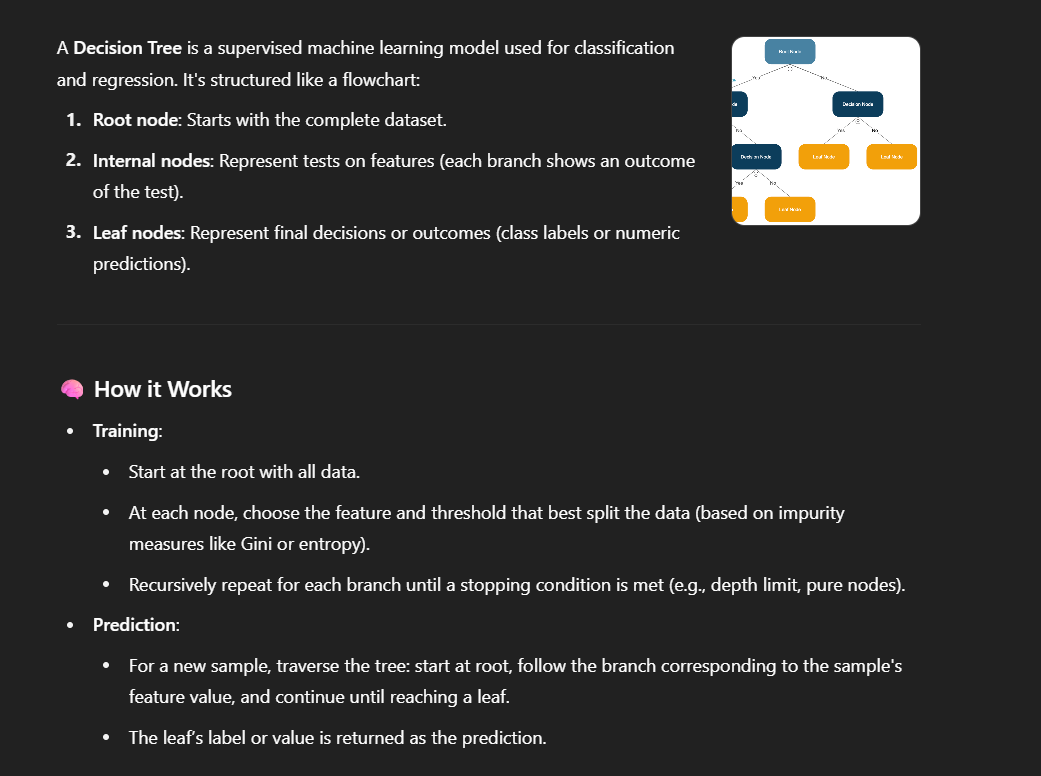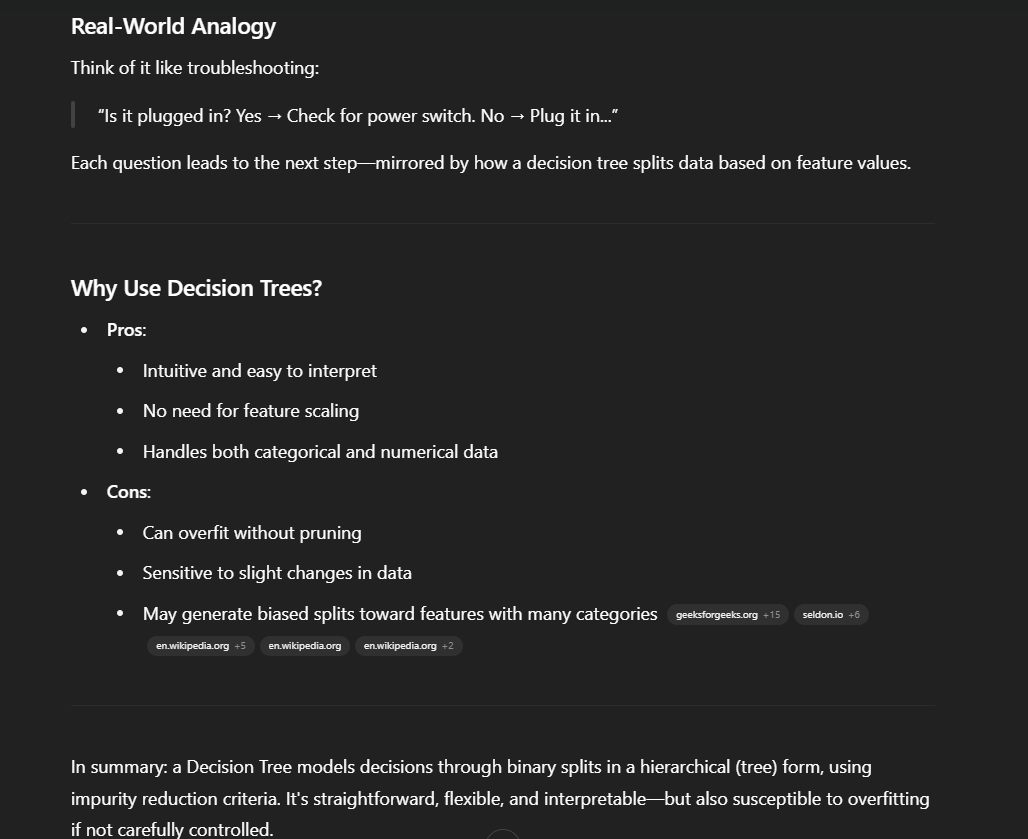

2. What are impurity measures in Decision Trees?

🌳 What are impurity measures in Decision Trees?

Impurity measures quantify how mixed the classes are at a node. The goal is to choose splits that reduce impurity, making child nodes more "pure" (i.e., containing mostly one class). They guide how decision trees decide which feature to split on.

🔢 Common Impurity Measures

1.Gini Impurity

*  Measures the probability of misclassifying a randomly chosen sample if it were labeled according to the node’s class distribution.

*   Range: [0 (pure), 0.5 (maximally mixed for binary classes)]

2.Entropy

*   A concept from information theory, measuring the uncertainty or disorder of class distribution.

*  Range: [0 (pure),
log
⁡
2
𝐶
log
2
​
 C ; typically [0,1] for binary]


 🧠 How They're Used in Trees

*  At each node, the impurity before splitting is calculated.

*   For each possible split, compute a weighted average impurity of the two resultant nodes.

*   Choose the split that most reduces impurity (maximizes impurity reduction, aka Gini gain or information gain).


✅ Summary

*   Impurity measures evaluate how “unclean” a node is.

*   Gini impurity and entropy are the most widely used.

*   They inform tree splitting by quantifying which split most effectively separates the classes.

*   Gini is computationally efficient; entropy is more theoretically grounded in information theory.

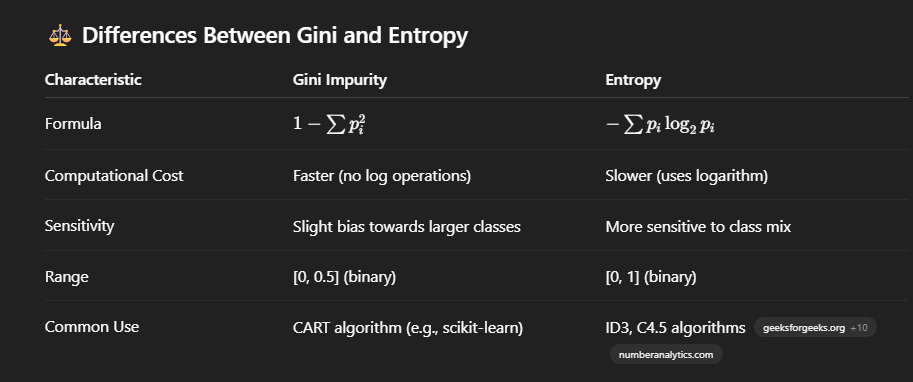

3. What is the mathematical formula for Gini Impurity?

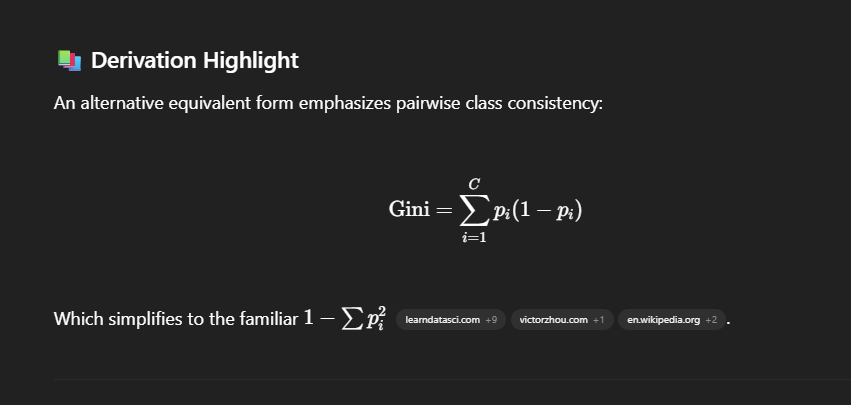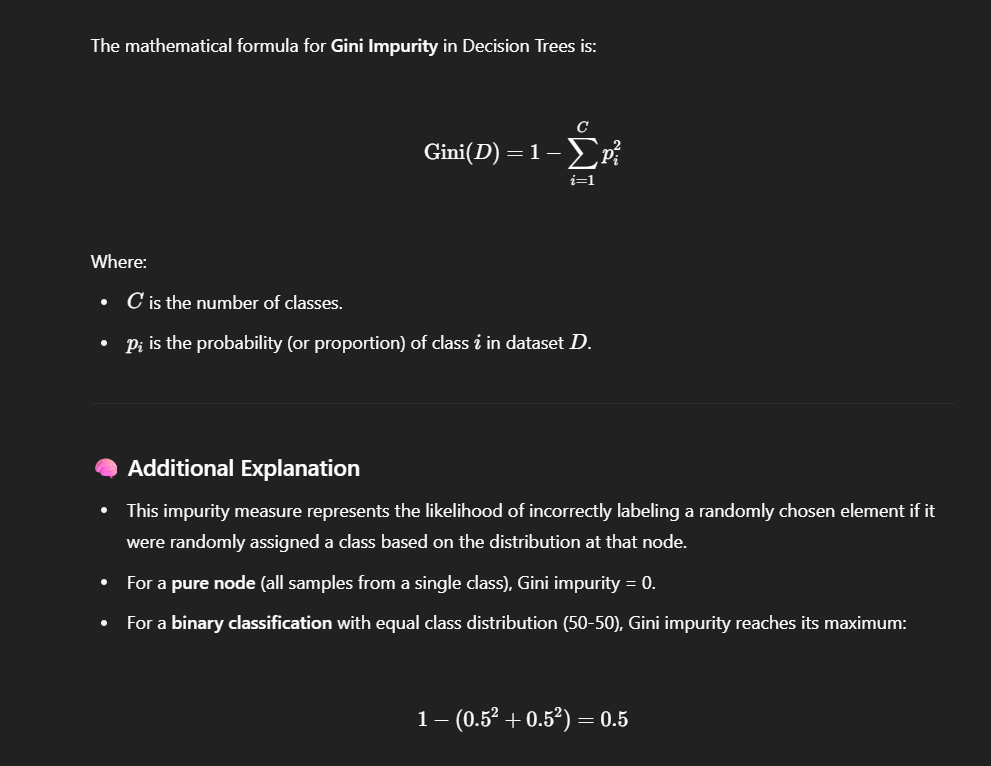

4. What is the mathematical formula for Entropy?

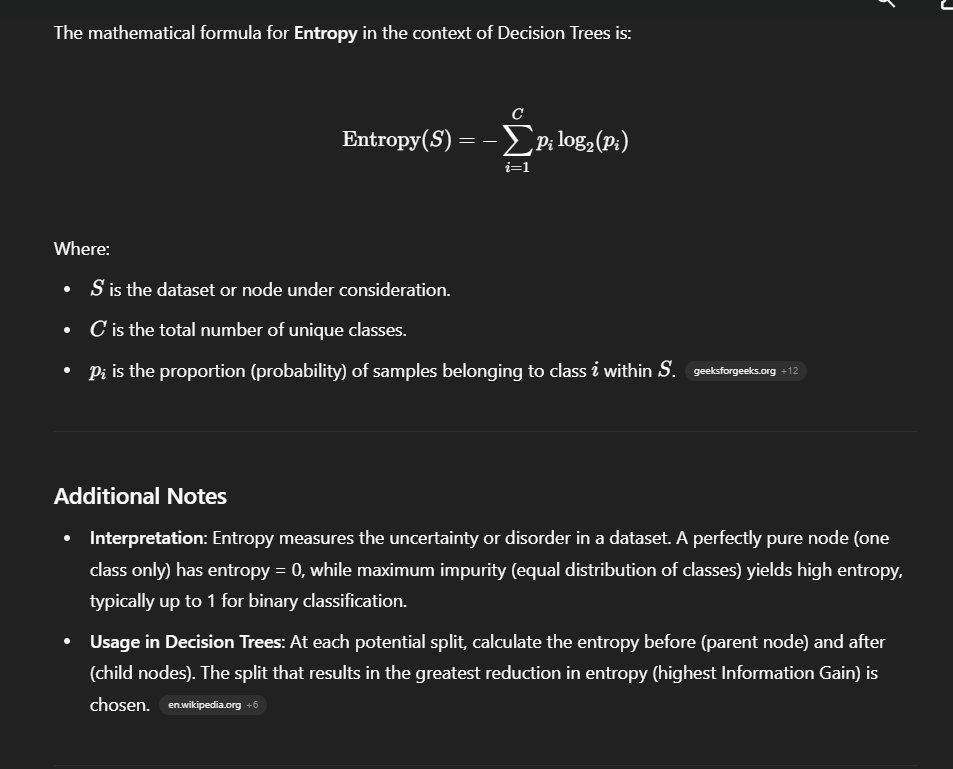

5. What is information Gain, and how is it uted in Decision Trees?

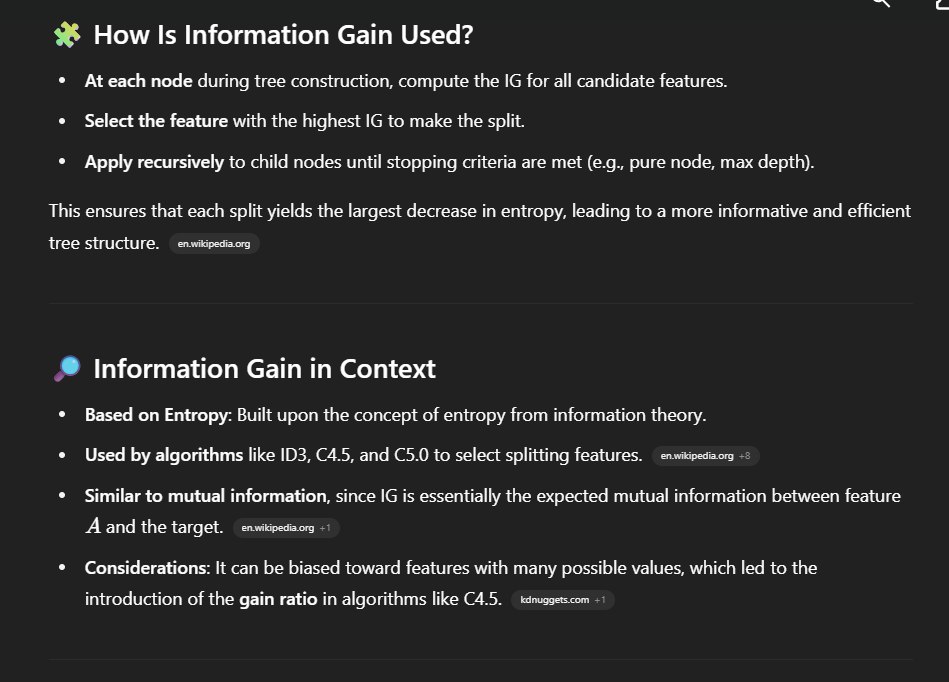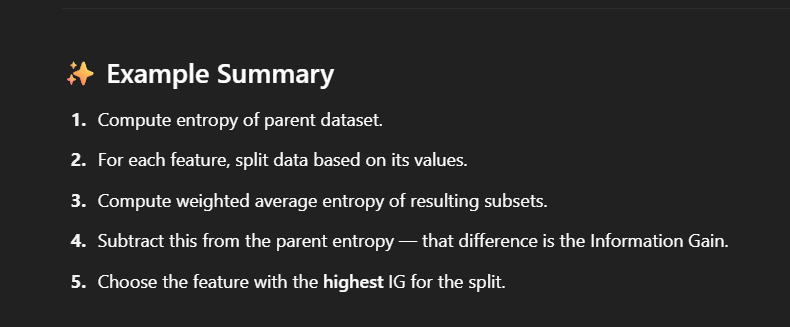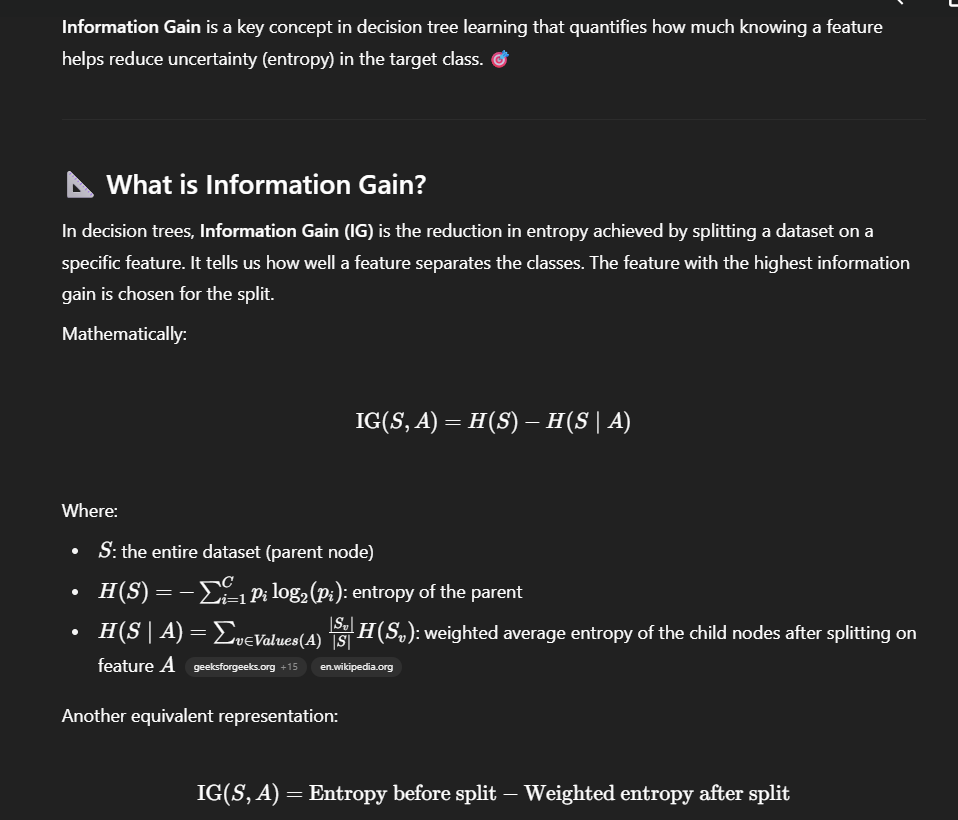

6. What is the difference between Gini Impurity and Entropy?

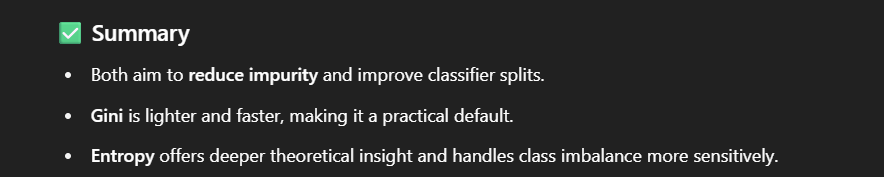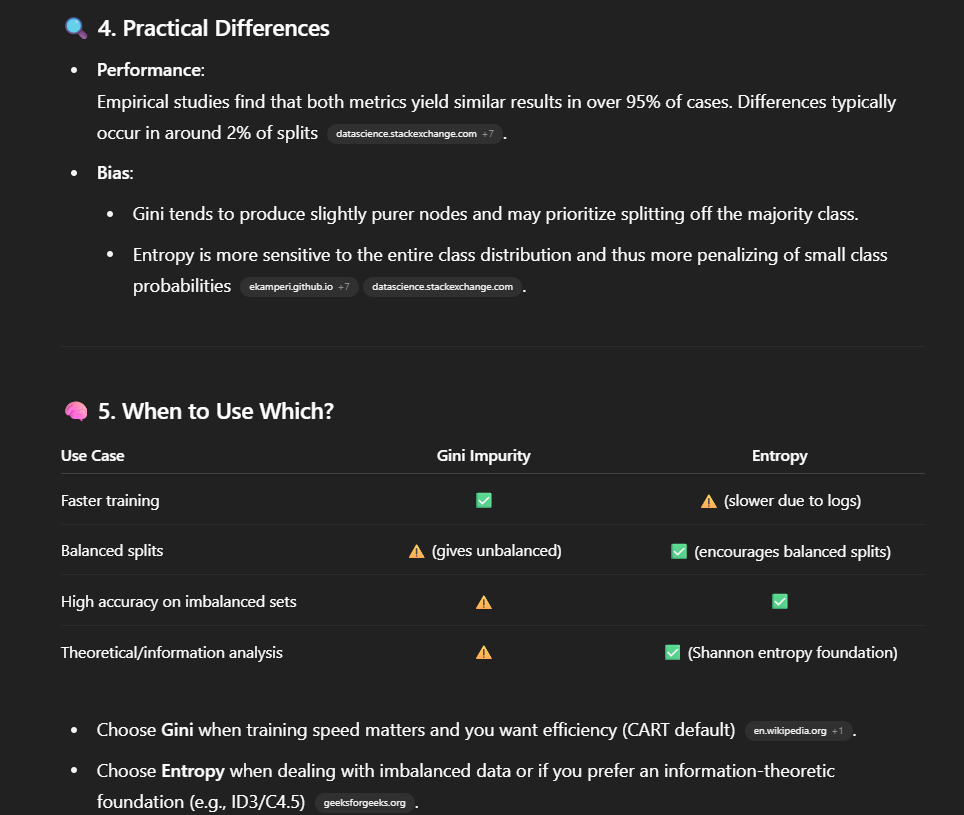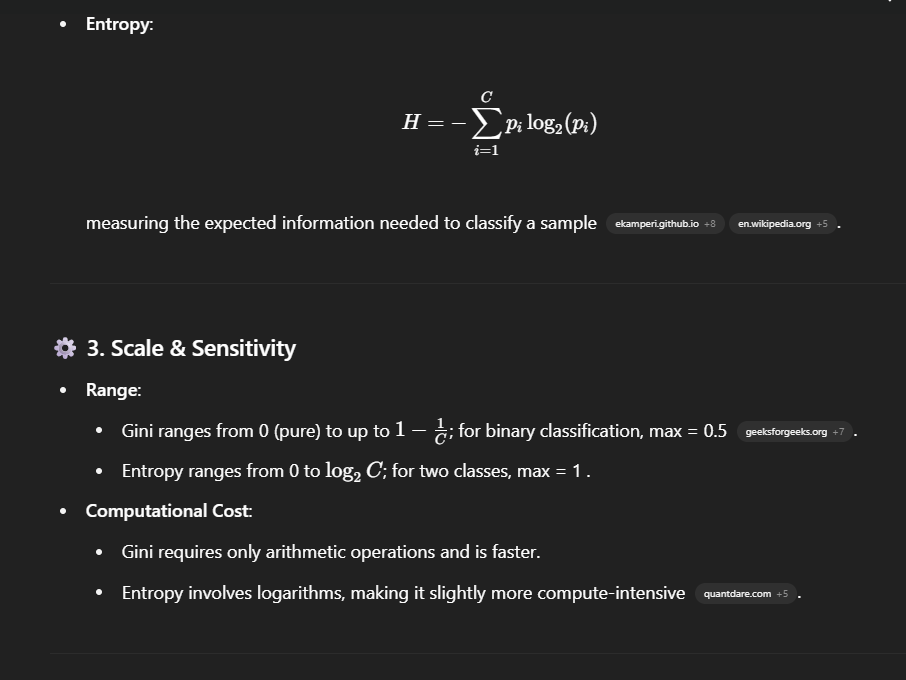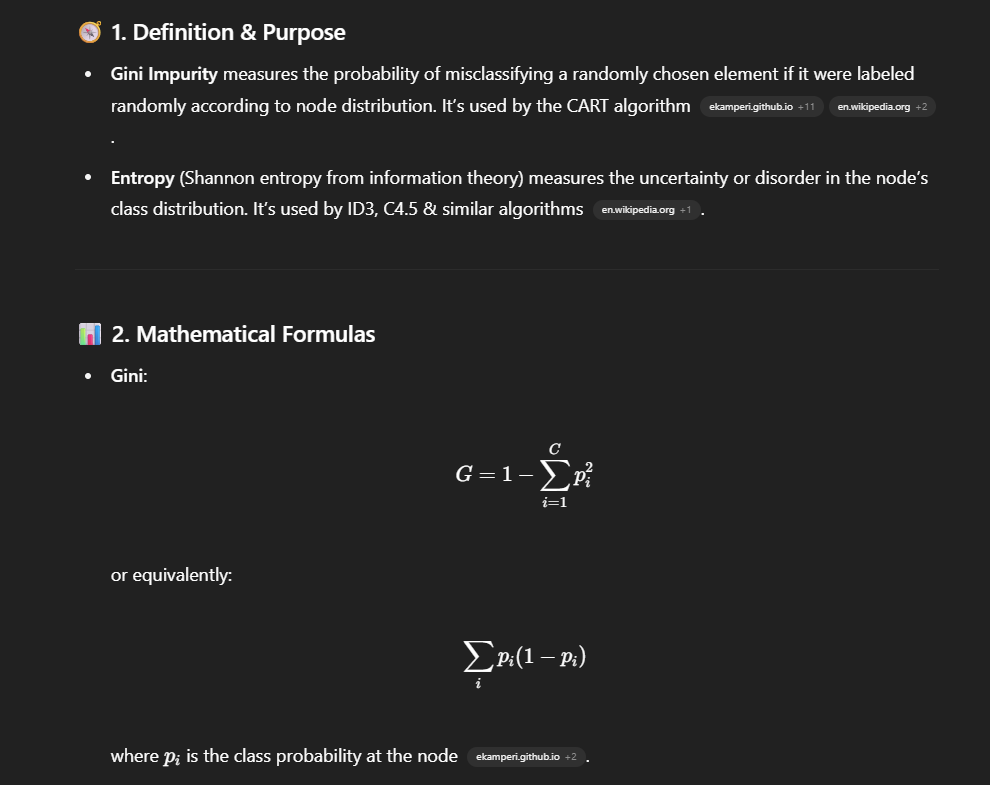

7. What is the mathematical explanation behind Decision Trees?

1. Framework

A decision tree partitions the feature space by repeatedly splitting data based on feature values, aiming to create groups that are as "pure" as possible—i.e., where data points mostly belong to one class. Nodes represent splits, and leaves represent class predictions or regression values

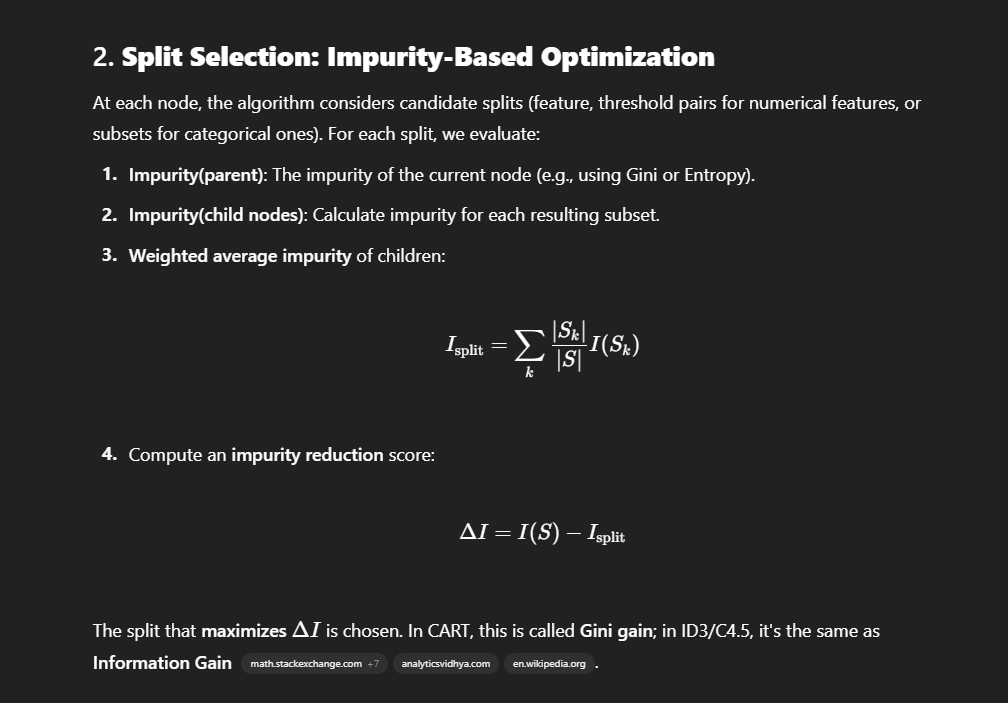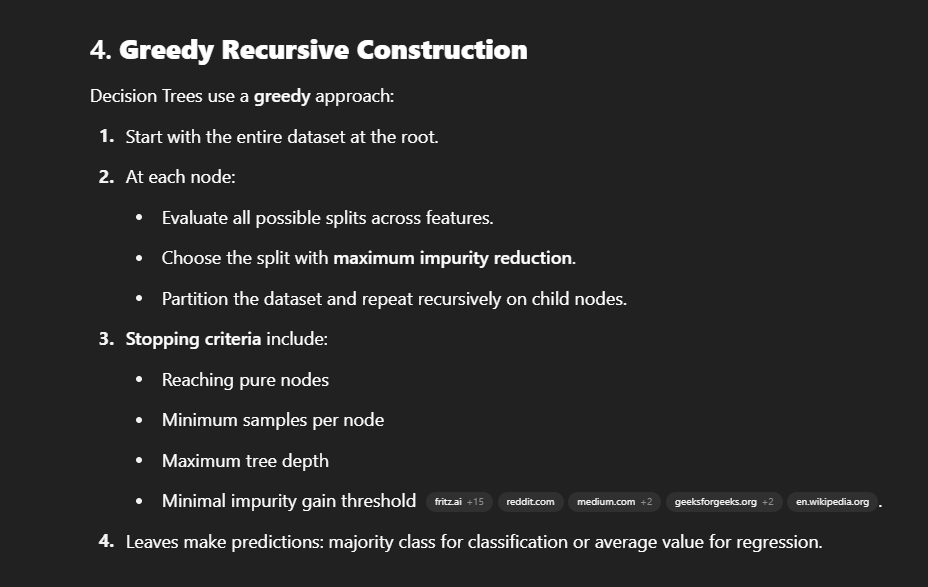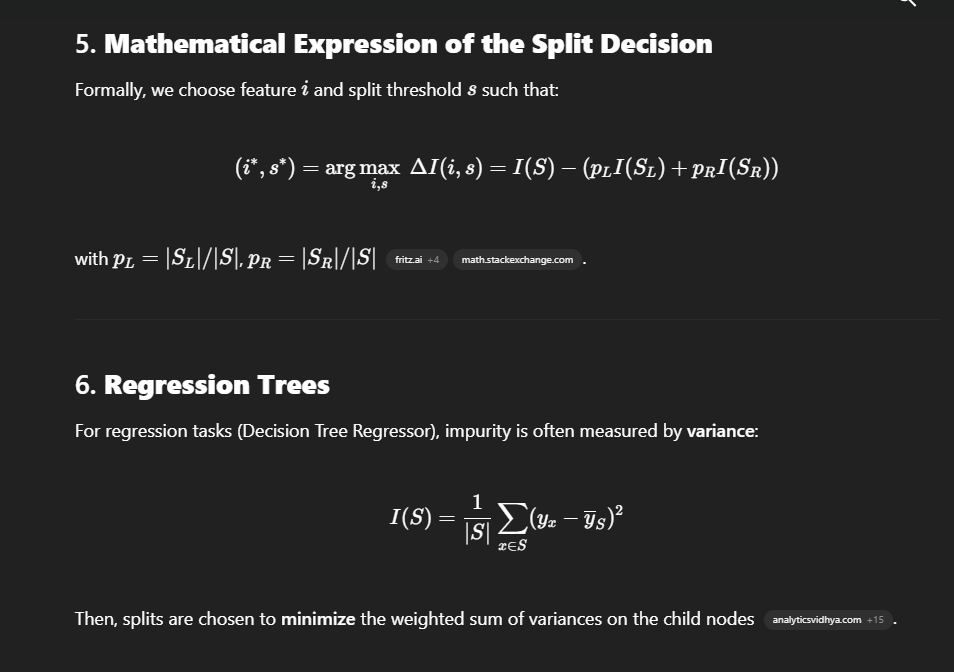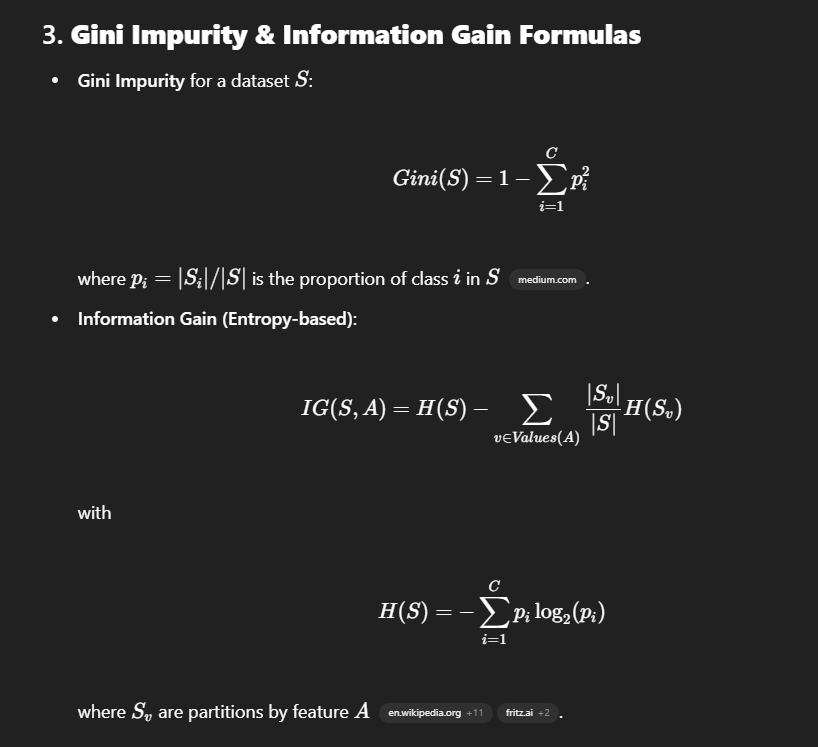

📘 Summary

*   Decision Trees work by greedily selecting splits that maximize reduction in impurity (whether using Gini, Entropy, or variance).

*   They recursively partition data until stopping criteria are met.

*   The result is a tree where each path from root to leaf defines a set of splitting conditions—essentially a logical set of rules.

8. What is Pre-Pruning in Decision Trees?

🍃 What is Pre‑Pruning in Decision Trees?

Pre‑Pruning, also known as Early Stopping, is a technique used to halt the growth of a decision tree during training—before it becomes overly complex. The goal is to prevent overfitting by imposing constraints that stop further splits when certain conditions are met.

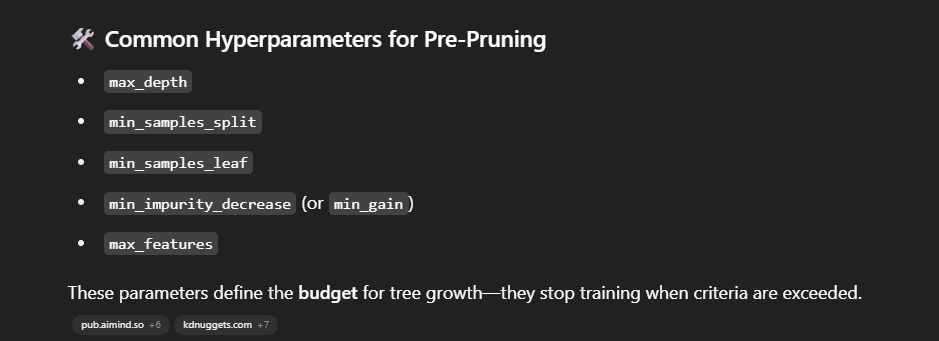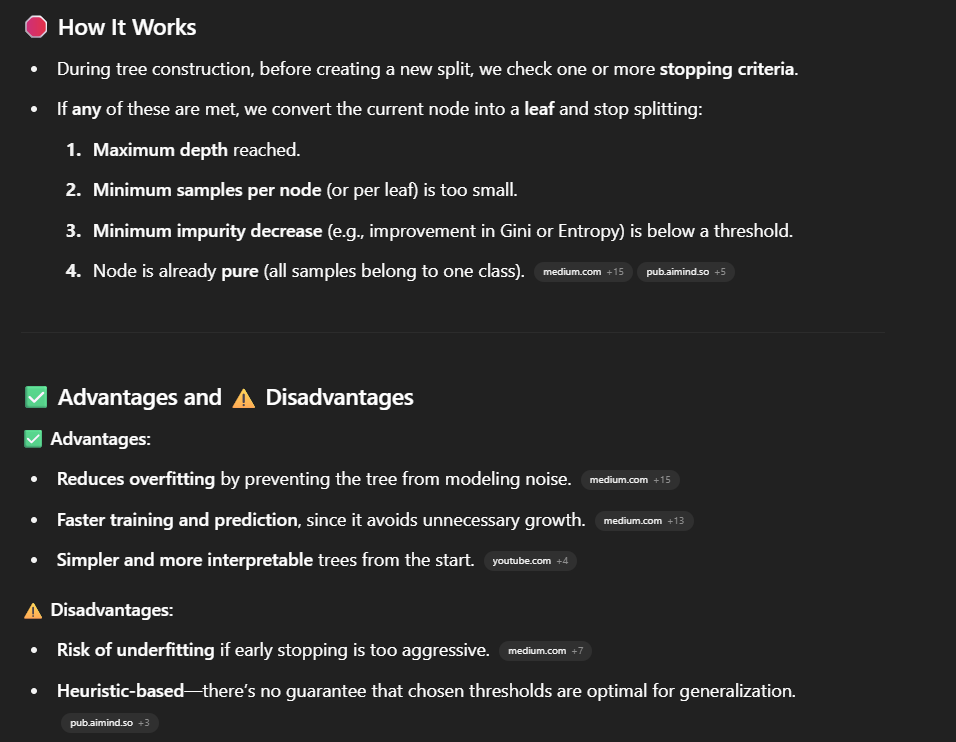

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=10,
    min_impurity_decrease=0.01,
    random_state=42
)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.01,
                       min_samples_leaf=10, random_state=42)

The tree stops growing when:

*   Depth reaches 5

*   Any node has fewer than 10 samples

*   Any split yields impurity reduction less than 0.01

📌 Summary

Pre‑pruning is a top-down strategy for simplifying trees during construction. It improves training speed and model generalization by avoiding over-complexity, but may underfit if constraints are too strict. Applying appropriate thresholds is key.

9. What is Post-Pruning in Decision Trees?

🪓 9. What is Post‑Pruning in Decision Trees?

Post‑pruning (also called cost‑complexity pruning, reduced‑error pruning, or pessimistic pruning) is a method for simplifying a fully grown decision tree by removing branches that add little value, thereby improving its ability to generalize to unseen data. This occurs after the tree has been fully constructed

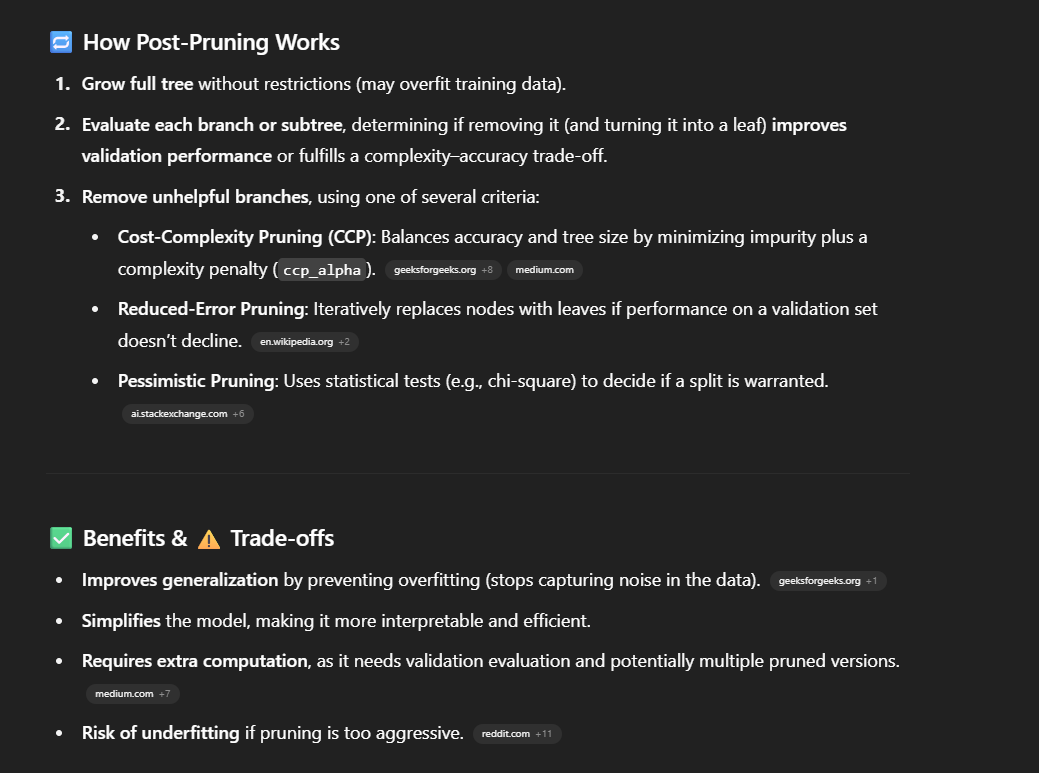

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
path = clf.cost_complexity_pruning_path(X_train, y_train)
alphas = path.ccp_alphas

best = None
best_score = 0
for alpha in alphas:
    temp = DecisionTreeClassifier(ccp_alpha=alpha, random_state=0)
    temp.fit(X_train, y_train)
    score = temp.score(X_val, y_val)
    if score > best_score:
        best_score, best = score, temp

print("Chosen α:", best.ccp_alpha)
print("Validation accuracy after pruning:", best_score)


This procedure selects the subtree with the best trade-off between complexity and accuracy and often yields better performance on unseen data.

🟰 Summary

*  Pre‑pruning stops tree growth early by imposing constraints.

*   Post‑pruning builds the full tree first, then prunes it back in a bottom‑up or top‑down fashion.

*   It finds the optimal subtree that balances accuracy and simplicity.

*   It’s widely used and considered more effective for preventing overfitting than pre‑pruning in many cases.

10. What is the difference between Pre-Prurning and Post-Pruning?

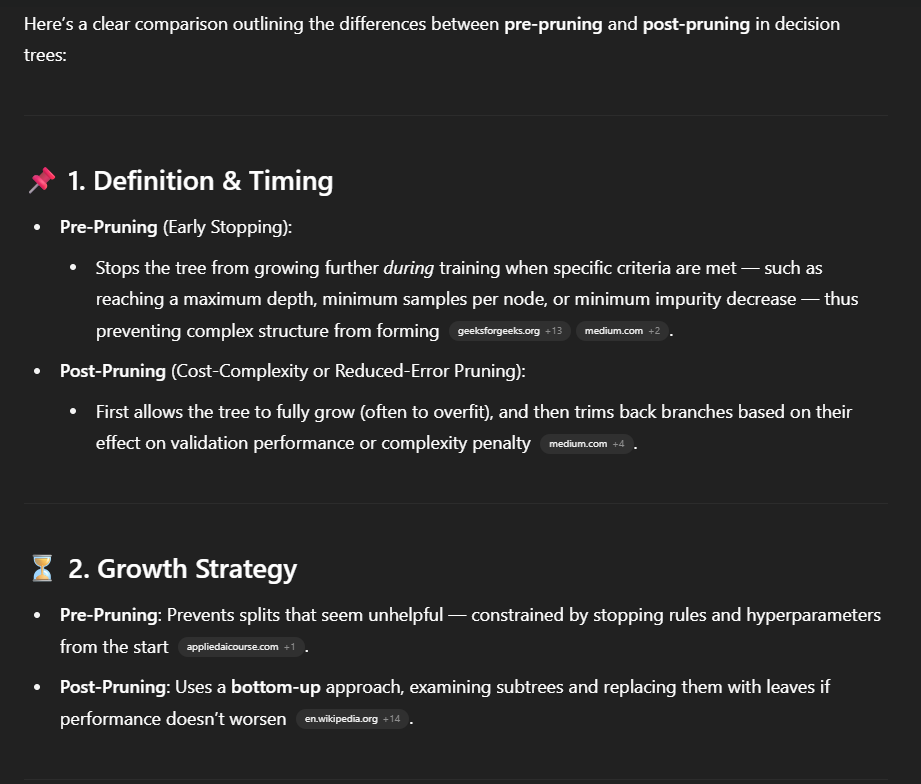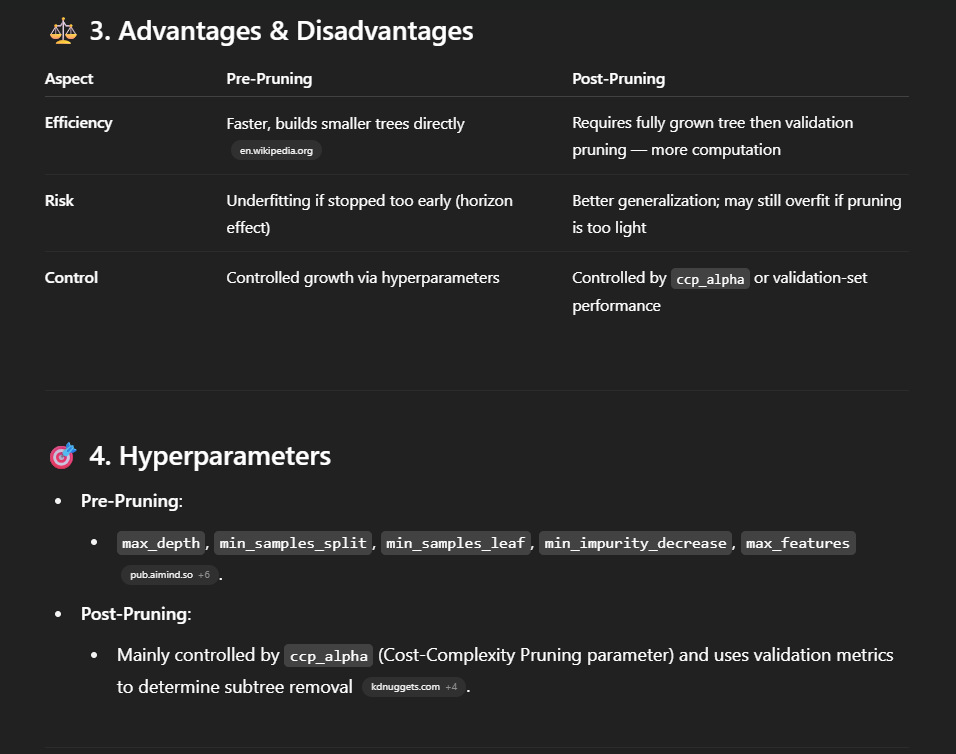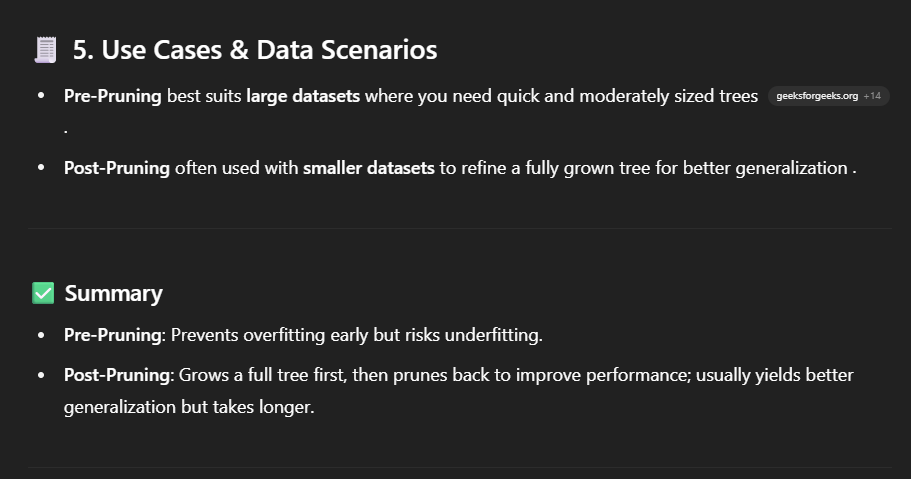

11. What is a Decision Tree Regressor?

A Decision Tree Regressor is a type of supervised machine learning model used for predicting continuous (numeric) values rather than discrete classes. Here’s a clear overview:

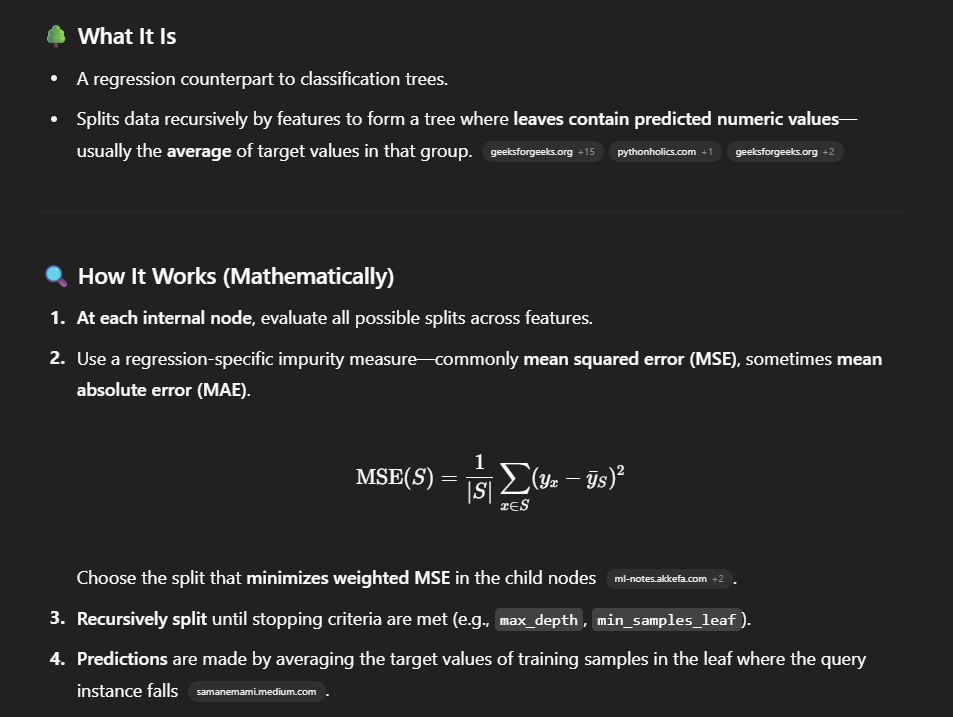

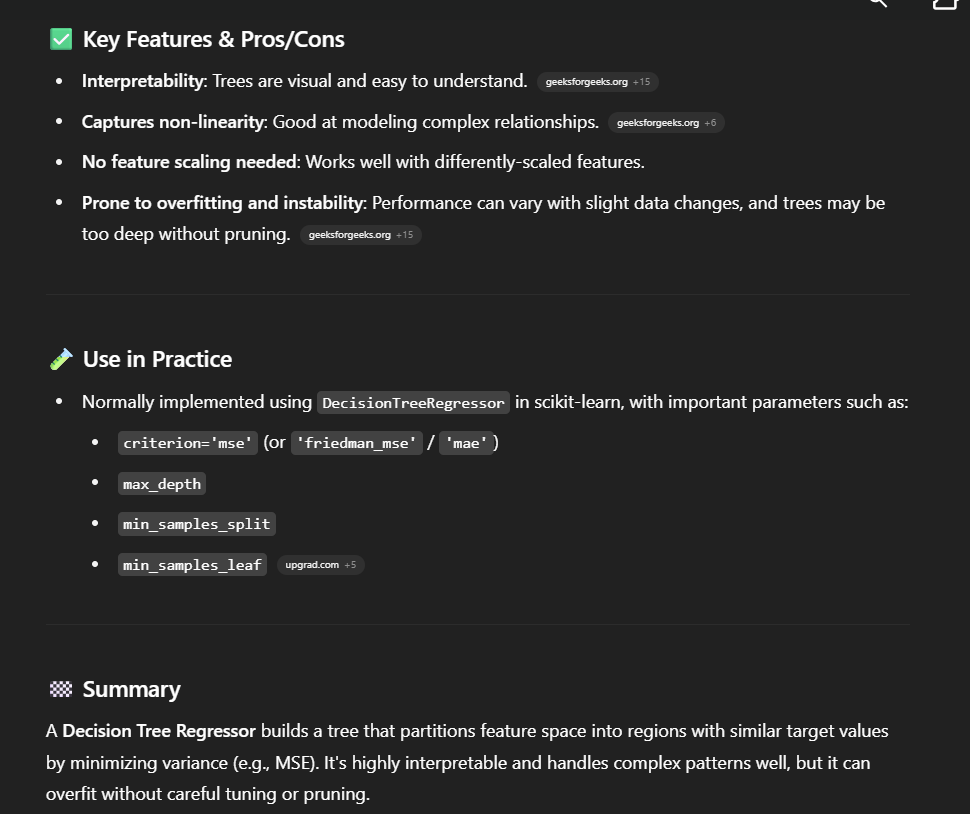

12. What are the advantages and disadvantages of Decision Trees?

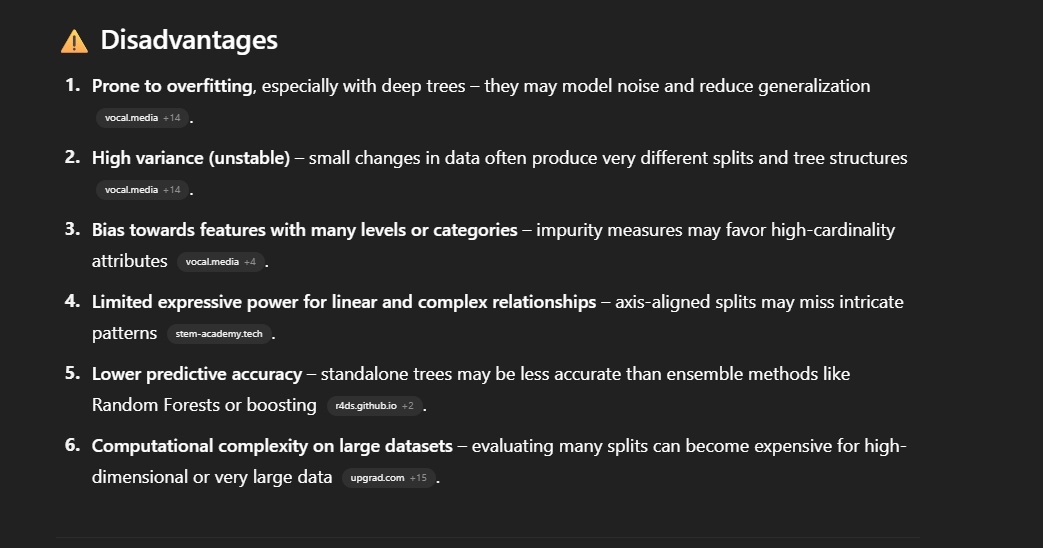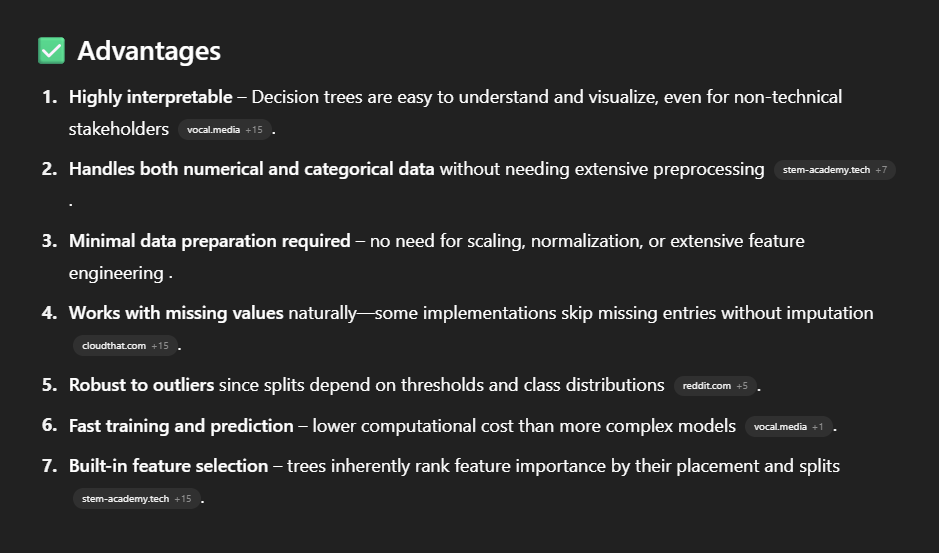

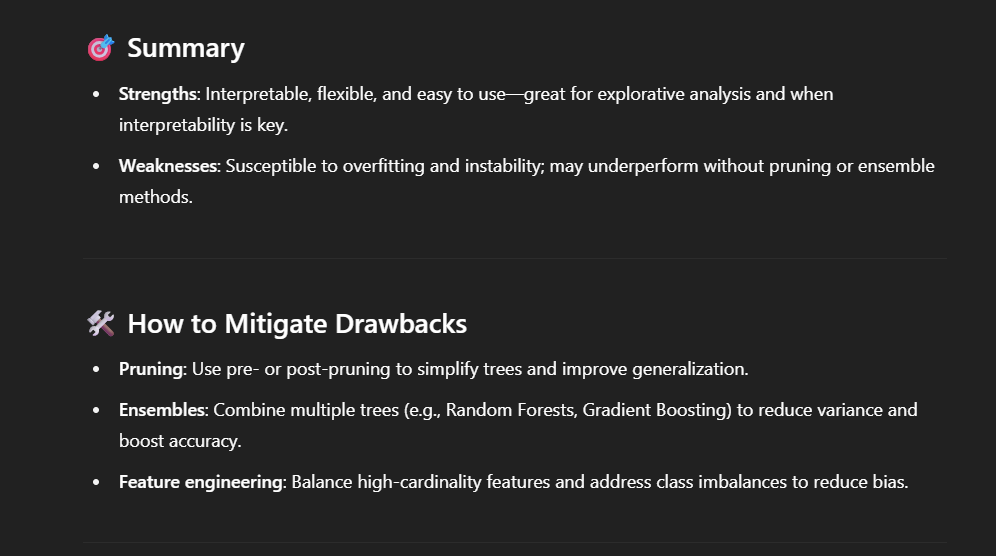

13. How does a Decision Tree handle missing values?

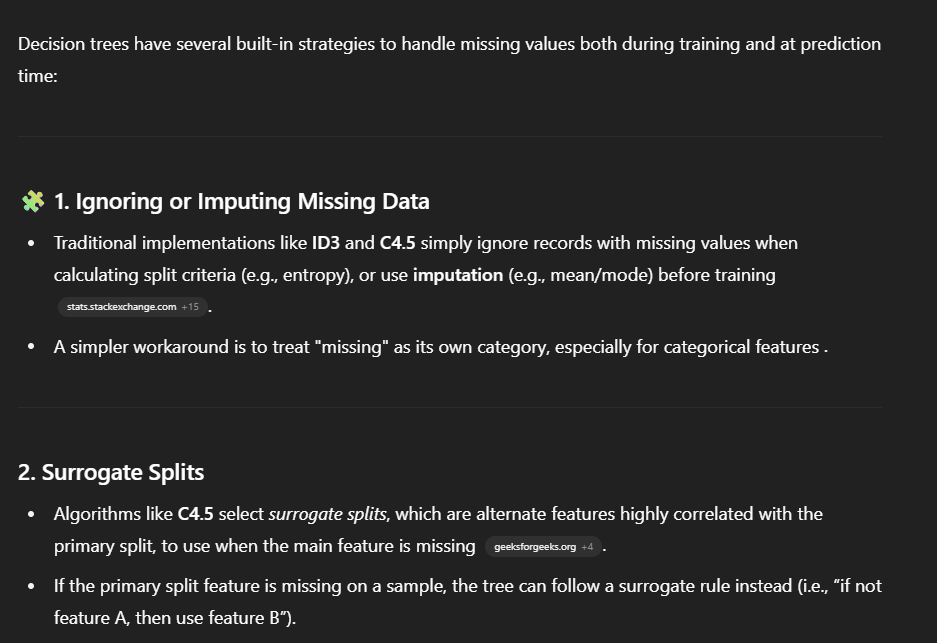

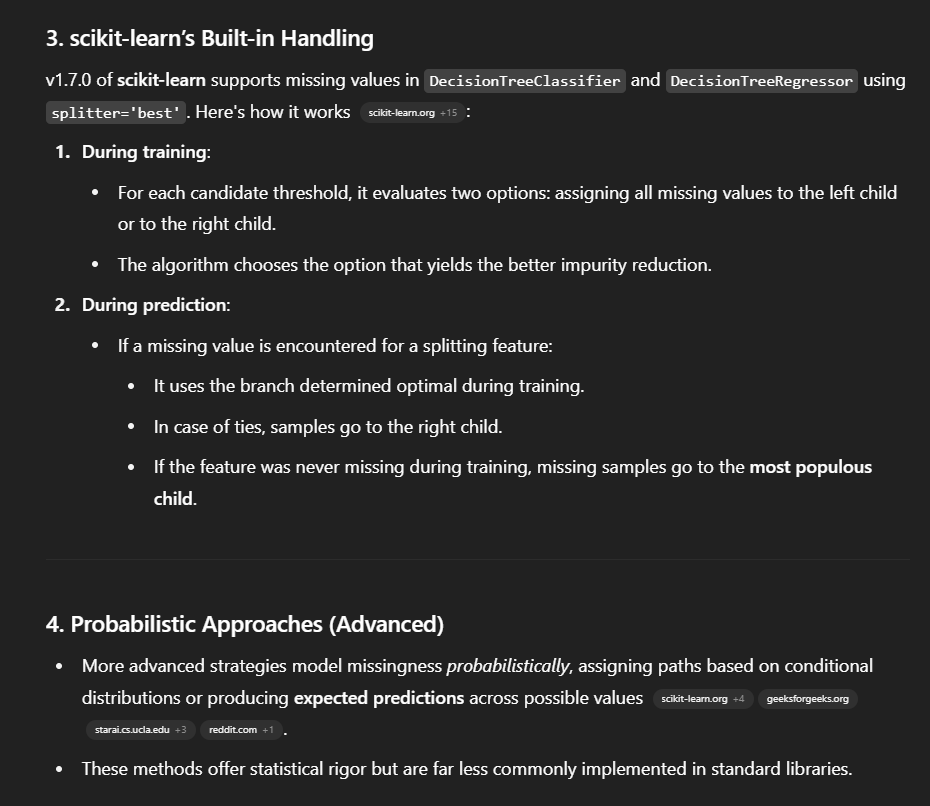

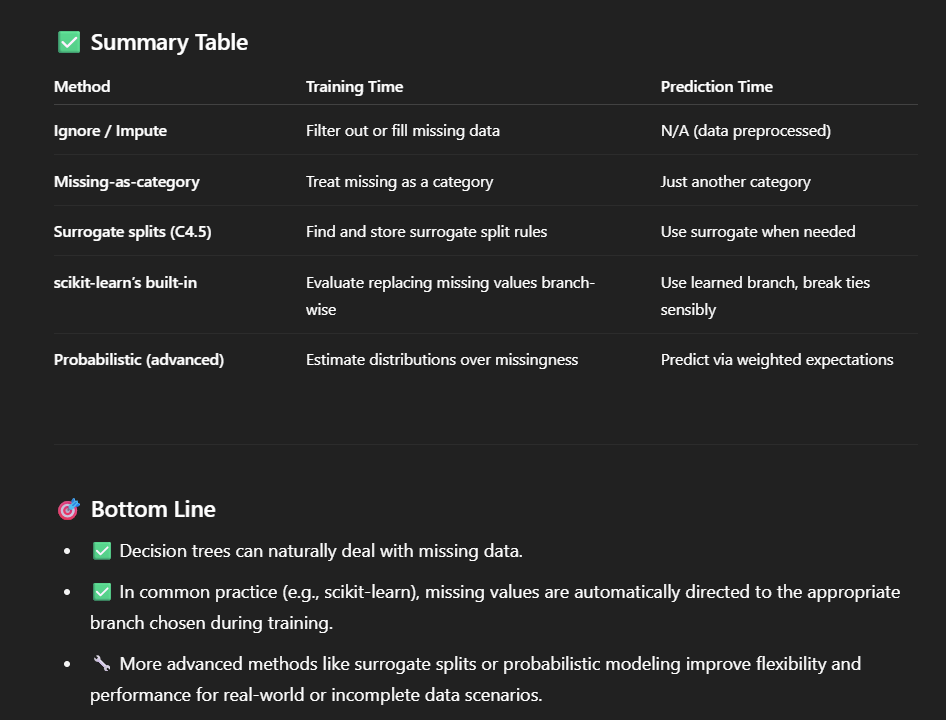

14. How does a Decision Tree handle categorical features?

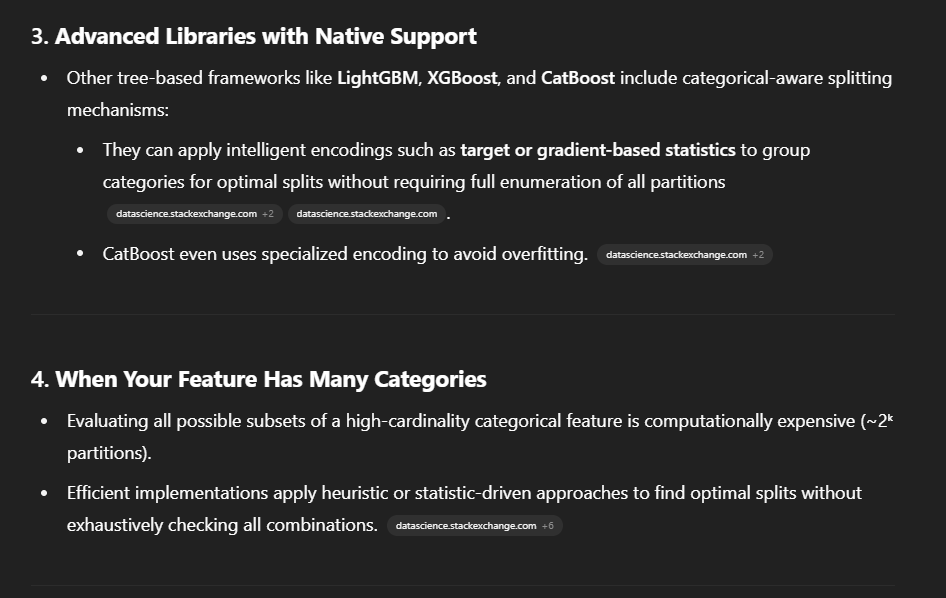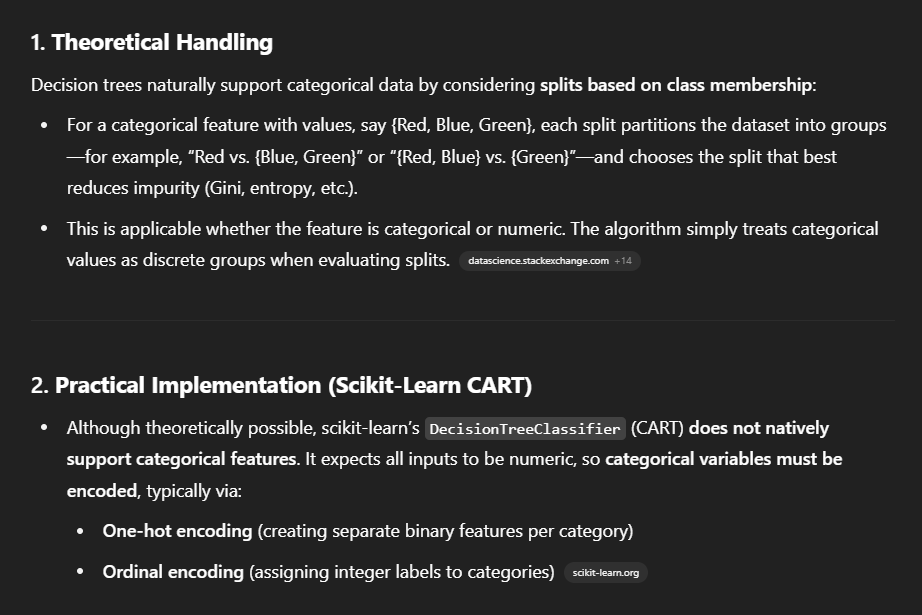

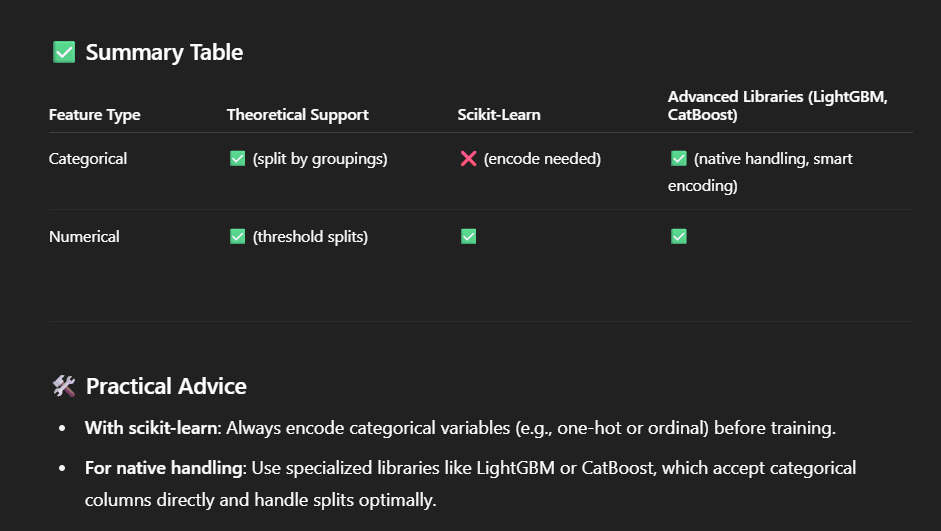

15. What are some real-world applications of Decision Trees?

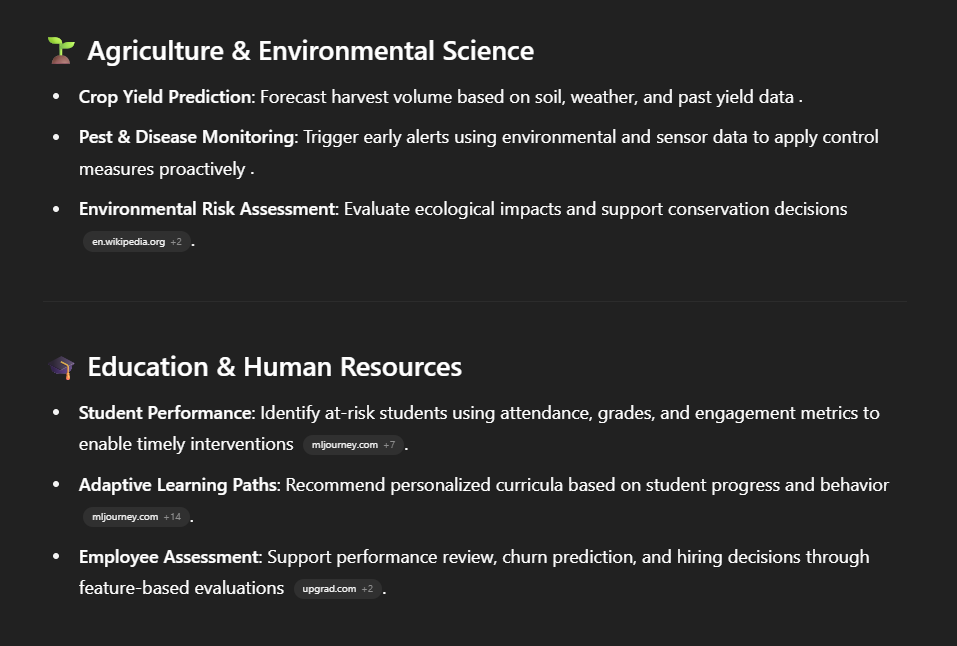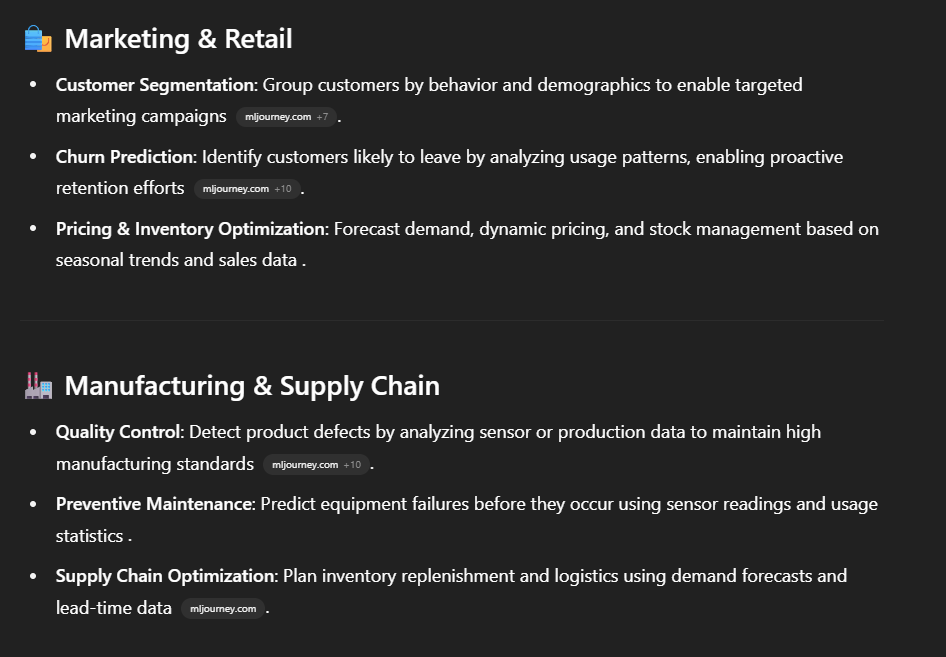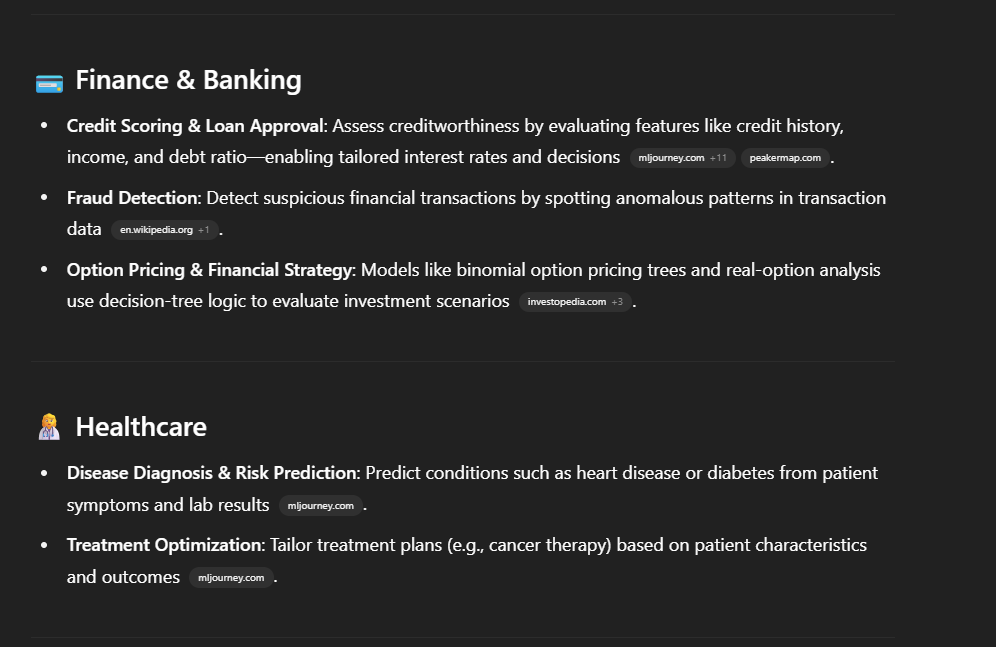

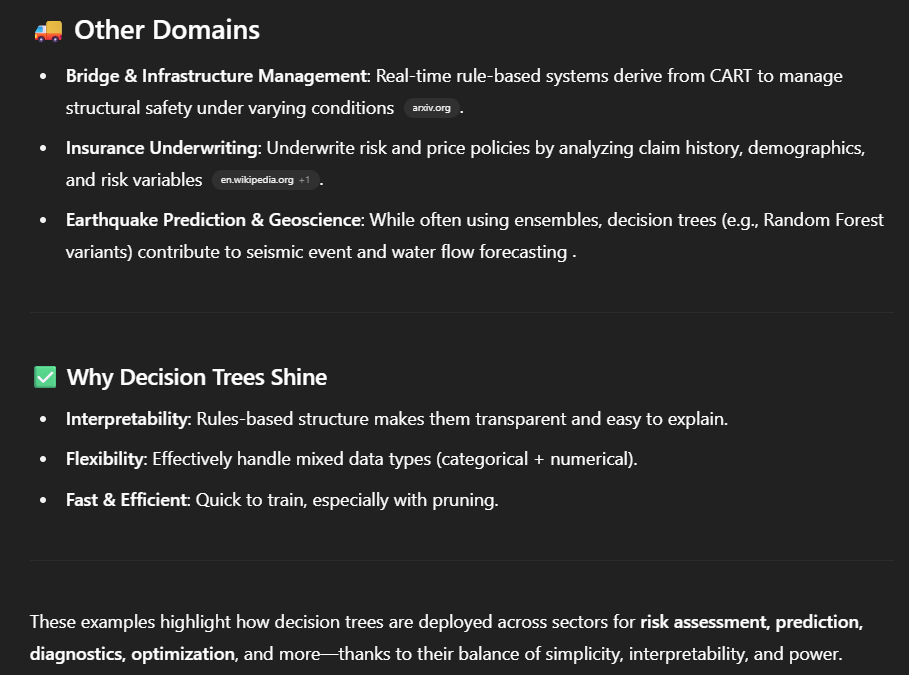

#PRACTICAL QUESTIONS

16. Write a Python program to train a Decision Tree Classifier on the iris dataset and print the model accuracy

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


17. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)
importances = clf.feature_importances_
print("Feature importances:", importances)


Feature importances: [0.         0.01911002 0.89326355 0.08762643]


18. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)
print("Entropy-model accuracy:", accuracy_score(y_test, clf.predict(X_test)))


Entropy-model accuracy: 0.9777777777777777


19. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X, y = housing.data, housing.target
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

reg = DecisionTreeRegressor()
reg.fit(Xtr, ytr)
y_pred = reg.predict(Xte)
print("MSE:", mean_squared_error(yte, y_pred))

MSE: 0.4910989157210029


20. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris_tree")


'iris_tree.pdf'

21. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree

In [ ]:
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)
acc_full = accuracy_score(y_test, clf_full.predict(X_test))

clf3 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf3.fit(X_train, y_train)
acc3 = accuracy_score(y_test, clf3.predict(X_test))

print(f"Full depth accuracy: {acc_full:.3f}")
print(f"Max depth=3 accuracy: {acc3:.3f}")


Full depth accuracy: 1.000
Max depth=3 accuracy: 1.000



22. Write a Python program to train a Decision Tree Classifier using min, samples, spilt 5 and compare its accuracy with a default tree

In [ ]:
clf_def = DecisionTreeClassifier(random_state=42)
clf_def.fit(X_train, y_train)
acc_def = accuracy_score(y_test, clf_def.predict(X_test))

clf5 = DecisionTreeClassifier(min_samples_split=5, random_state=42)
clf5.fit(X_train, y_train)
acc5 = accuracy_score(y_test, clf5.predict(X_test))

print(f"Default acc: {acc_def:.3f}, min_samples_split=5 acc: {acc5:.3f}")


Default acc: 1.000, min_samples_split=5 acc: 1.000



23. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

clf_scaled = DecisionTreeClassifier(random_state=42)
clf_scaled.fit(X_train_s, y_train)
acc_scaled = accuracy_score(y_test, clf_scaled.predict(X_test_s))
acc_unscaled = accuracy_score(y_test, clf.predict(X_test))

print(f"Unscaled accuracy: {acc_unscaled:.3f}")
print(f"Scaled accuracy: {acc_scaled:.3f}")


Unscaled accuracy: 1.000
Scaled accuracy: 1.000


24. White a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ovr.fit(X_train, y_train)
print("OvR accuracy:", accuracy_score(y_test, ovr.predict(X_test)))


OvR accuracy: 1.0


25. Write a Python program to train a Decision Tree Classifier and display the feature importance scores

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
for name, score in zip(iris.feature_names, clf.feature_importances_):
    print(f"{name}: {score:.3f}")


sepal length (cm): 0.000
sepal width (cm): 0.019
petal length (cm): 0.893
petal width (cm): 0.088


26. Write a Python program to train a Decision Tree Regressor with max, depth and compare its performance with an unrestricted tree

In [ ]:
reg_un = DecisionTreeRegressor(random_state=42)
reg_un.fit(Xtr, ytr)
mse_un = mean_squared_error(yte, reg_un.predict(Xte))

reg4 = DecisionTreeRegressor(max_depth=4, random_state=42)
reg4.fit(Xtr, ytr)
mse4 = mean_squared_error(yte, reg4.predict(Xte))

print(f"Unrestricted MSE: {mse_un:.3f}")
print(f"Max depth=4 MSE: {mse4:.3f}")


Unrestricted MSE: 0.495
Max depth=4 MSE: 0.584


27. Write a Python program to train a Decision Tree Classifier, apply Cast Complexity Pruning (CCP), and visualize its effect on accuracy

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

for alpha in ccp_alphas[:5]:
    clf_ccp = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    clf_ccp.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf_ccp.predict(X_test))
    print(f"alpha={alpha:.5f}, accuracy={acc:.3f}")


alpha=0.00000, accuracy=1.000
alpha=0.00924, accuracy=1.000
alpha=0.01270, accuracy=1.000
alpha=0.01270, accuracy=1.000
alpha=0.01847, accuracy=1.000


28. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall and F1-Score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

clf.fit(X_train, y_train)
yp = clf.predict(X_test)

print("Precision:", precision_score(y_test, yp, average='macro'))
print("Recall:", recall_score(y_test, yp, average='macro'))
print("F1-score:", f1_score(y_test, yp, average='macro'))


Precision: 1.0
Recall: 1.0
F1-score: 1.0


29. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seasborn

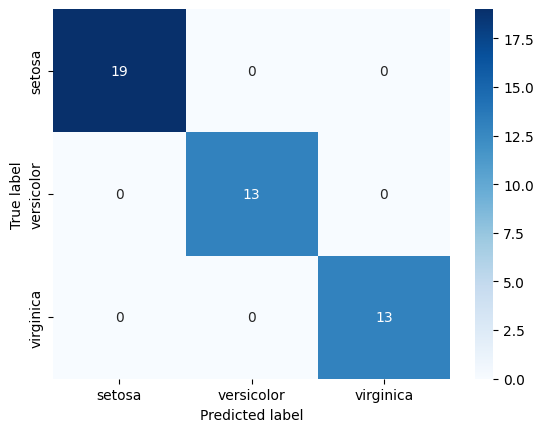

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, yp)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

30 Write a Python program to train a decision Tree Classifier and use GridsearchCv to find the optimal values for max_depth and min_samples_split.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [2,3,4,5], 'min_samples_split': [2,5,10]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)


Best params: {'max_depth': 4, 'min_samples_split': 10}
Best CV accuracy: 0.9428571428571428
